# Лабораторная работа №4

## Условие

Вариант №11

Распределения:

$$\mathbf{X} \sim \chi^2(1)$$
$$\mathbf{Y} \sim R(0, 1)$$

Объём выборки:

$$ n = 200 $$


## Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  
import pandas as pd

## Определения

In [2]:
df1 = 1
a2, b2 = 0, 1
n = 200

In [3]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [4]:
def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table

In [5]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

## 1. Исходные данные

In [6]:
X = np.random.chisquare(df1, n)
Y = np.random.uniform(a2, b2, n)

mprint(f"$X$: {X[:10].round(2)}")
mprint(f"$Y$: {Y[:10].round(2)}")


$X$: [0.   0.48 1.44 0.04 0.23 0.43 7.13 1.33 1.37 0.02]

$Y$: [0.8  0.06 0.67 0.31 0.98 0.48 0.96 0.73 0.85 0.88]

### Характеристики наблюдаемых случайных величин

| СВ  | Распределение | Параметры                | Математическое ожидание, $m_i$                     | Дисперсия, $\sigma_i^2$                                   | Объём выборки, $n_i$ |
| --- | ------------- | ------------------------ | -------------------------------------------------- | ---------------------------------------------------------- | -------------------- |
| $X$ | $\chi^2(1)$  | $k_1 = 1$                | $m_1 = k_1 = 1$                                    | $\sigma_1^2 = 2 k_1 = 2$                                  | 200                  |
| $Y$ | $R(0, 1)$     | $a_2 = 0, b_2 = 1$       | $m_2 = \dfrac{a_2 + b_2}{2} = \dfrac{1}{2}$      | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{1}{12}$ | 200                  |


### Выборочные характеристики

In [7]:
mean_X = X.mean()
S_X = X.var(ddof=1)

mean_Y = Y.mean()
S_Y = Y.var(ddof=1)

r_XY = stats.pearsonr(X, Y)[0]
rho_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(f"$\\overline{{x}} =$ {mean_X:.2f}, $s_X^2 =$ {S_X:.2f}")
mprint(f"$\\overline{{y}} =$ {mean_Y:.2f}, $s_Y^2 =$ {S_Y:.2f}")

mprint(
    f"$r_{{XY}} =$ {r_XY:.2f}, $\\rho_{{XY}} =$ {rho_XY:.2f}, $\\tau_{{XY}} =$ {tau_XY:.2f}"
)

$\overline{x} =$ 1.15, $s_X^2 =$ 2.23

$\overline{y} =$ 0.50, $s_Y^2 =$ 0.08

$r_{XY} =$ 0.13, $\rho_{XY} =$ 0.10, $\tau_{XY} =$ 0.06

| СВ  | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | КК по Пирсону, $r_{XY}$ | КК по Спирмену, $\rho_{XY}$ | КК по Кендаллу, $\tau_{XY}$ |
| --- | ------------------------- | ------------------------- | ----------------------- | --------------------------- | --------------------------- |
| X   | 1.15                     | 2.23                      | 0.13                    | 0.10                        | 0.06                        |
| Y   | 0.50                     | 0.08                      | 0.13                    | 0.10                        | 0.06                        |

### Проверка значимости коэффициентов корреляции

In [8]:
z_r_XY = r_XY * sqrt(n - 2) / sqrt(1 - r_XY**2)
p_r_XY = stats.pearsonr(X, Y)[1]

z_rho_XY = rho_XY * sqrt(n - 2) / sqrt(1 - rho_XY**2)
p_rho_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * sqrt(9 * n * (n + 1)) / sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $r_{XY}$",
    f"$H_0$: $r_{{XY}} = 0$, $H_1$: $r_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_r_XY:.2f}, ",
    f"$p =$ {p_r_XY:.2f}",
    verdict(alpha, p_r_XY),
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $r_{XY}$

$H_0$: $r_{XY} = 0$, $H_1$: $r_{XY} \neq 0$

$z_{выб} =$ 1.88, 

$p =$ 0.06

$H_0$ принимается

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 1.35, 

$p =$ 0.18

$H_0$ принимается

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 1.36, 

$p =$ 0.18

$H_0$ принимается

| Статистическая гипотеза, $H_0$                 | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| $H_0:\ r_{XY} = 0 \\H_1:\ r_{XY} \neq 0$       | 0.06      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \rho_{XY} = 0 \\H_1:\ \rho_{XY} \neq 0$ | 0.18      | $H_0$ принимается                          | Нет                            |
| $H_0:\ \tau_{XY} = 0 \\H_1:\ \tau_{XY} \neq 0$ | 0.18      | $H_0$ принимается                          | Нет                            |


## 2. Визуальное представление двумерной выборки

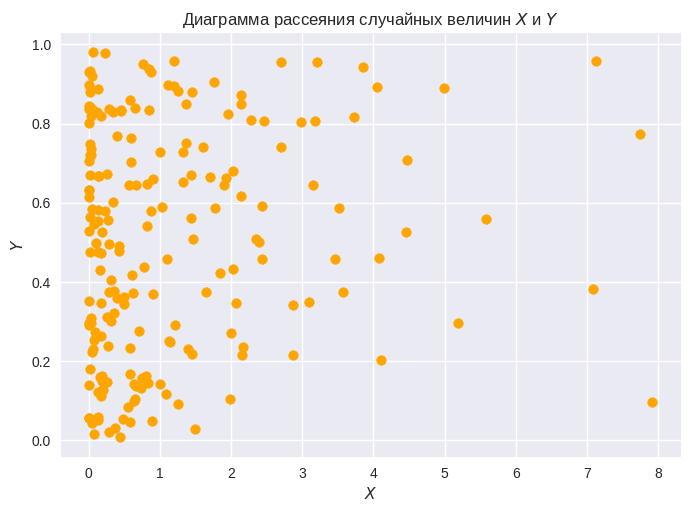

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = False  

plt.scatter(X, Y, color="orange")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.title(r"Диаграмма рассеяния случайных величин $X$ и $Y$")
plt.show()

## 3. Проверка независимости методом таблиц сопряженности

Статистическая гипотеза: $H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y); \quad H':\ \exists i, j: F_Y(y \mid X \in \Delta_i) \neq F_Y(y \mid X \in \Delta_j)$

### Эмпирическая таблица сопряженности

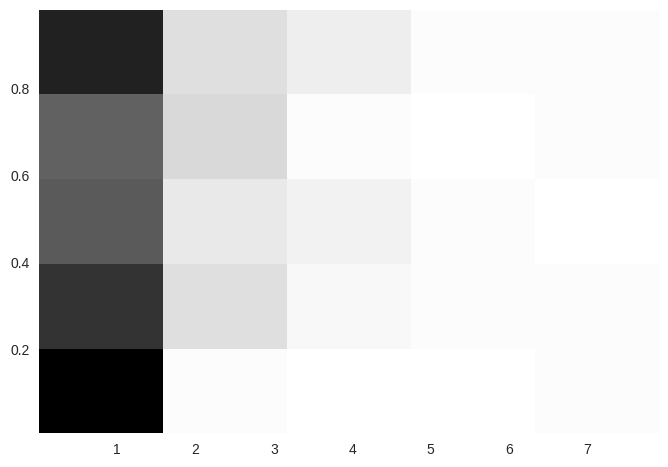

In [10]:
k = 5

emperical_table, bin_edges_X, bin_edges_Y, _ = plt.hist2d(X, Y, bins=k)

In [11]:
columns = [f"[{bin_edges_Y[i]:.2f}, {bin_edges_Y[i+1]:.2f})" for i in range(k - 1)] + [
    f"[{bin_edges_Y[-2]:.2f}, {bin_edges_Y[-1]:.2f}]"
]
indexes = [
    f"$\\Delta_{{{i+1}}} =$ [{bin_edges_X[i]:.2f}, {bin_edges_X[i+1]:.2f})"
    for i in range(k - 1)
] + [f"$\\Delta_{{{k}}} =$ [{bin_edges_X[-2]:.2f}, {bin_edges_X[-1]:.2f}]"]

emperical_table = pd.DataFrame(
    emperical_table,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
emperical_table

Y,"[0.01, 0.20)","[0.20, 0.40)","[0.40, 0.59)","[0.59, 0.78)","[0.78, 0.98]"
X,,,,,
"$\Delta_{1} =$ [0.00, 1.58)",36.0,30.0,26.0,25.0,32.0
"$\Delta_{2} =$ [1.58, 3.17)",1.0,8.0,6.0,9.0,8.0
"$\Delta_{3} =$ [3.17, 4.75)",0.0,2.0,4.0,1.0,5.0
"$\Delta_{4} =$ [4.75, 6.34)",0.0,1.0,1.0,0.0,1.0
"$\Delta_{5} =$ [6.34, 7.92]",1.0,1.0,0.0,1.0,1.0


In [12]:
print(dataframe_to_markdown(emperical_table))

| X\Y | [0.01, 0.20) | [0.20, 0.40) | [0.40, 0.59) | [0.59, 0.78) | [0.78, 0.98] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [0.00, 1.58) | 36.0 | 30.0 | 26.0 | 25.0 | 32.0 |
| $\Delta_{2} =$ [1.58, 3.17) | 1.0 | 8.0 | 6.0 | 9.0 | 8.0 |
| $\Delta_{3} =$ [3.17, 4.75) | 0.0 | 2.0 | 4.0 | 1.0 | 5.0 |
| $\Delta_{4} =$ [4.75, 6.34) | 0.0 | 1.0 | 1.0 | 0.0 | 1.0 |
| $\Delta_{5} =$ [6.34, 7.92] | 1.0 | 1.0 | 0.0 | 1.0 | 1.0 |



### Теоретическая таблица сопряженности

In [13]:
V1 = emperical_table.sum(axis=1).values
V1 = np.atleast_2d(V1).T
V1

array([[149.],
       [ 32.],
       [ 12.],
       [  3.],
       [  4.]])

In [14]:
V2 = emperical_table.sum(axis=0).values
V2 = np.atleast_2d(V2)
V2

array([[38., 42., 37., 36., 47.]])

In [15]:
theoretical_table = pd.DataFrame(
    np.dot(V1, V2) / n,
    columns=pd.Index(columns, name="Y"),
    index=pd.Index(indexes, name="X"),
)
theoretical_table

Y,"[0.01, 0.20)","[0.20, 0.40)","[0.40, 0.59)","[0.59, 0.78)","[0.78, 0.98]"
X,,,,,
"$\Delta_{1} =$ [0.00, 1.58)",28.31,31.29,27.565,26.82,35.015
"$\Delta_{2} =$ [1.58, 3.17)",6.08,6.72,5.920,5.76,7.520
"$\Delta_{3} =$ [3.17, 4.75)",2.28,2.52,2.220,2.16,2.820
"$\Delta_{4} =$ [4.75, 6.34)",0.57,0.63,0.555,0.54,0.705
"$\Delta_{5} =$ [6.34, 7.92]",0.76,0.84,0.740,0.72,0.940


In [16]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | [0.01, 0.20) | [0.20, 0.40) | [0.40, 0.59) | [0.59, 0.78) | [0.78, 0.98] |
|---|---|---|---|---|---|
| $\Delta_{1} =$ [0.00, 1.58) | 28.31 | 31.29 | 27.57 | 26.82 | 35.02 |
| $\Delta_{2} =$ [1.58, 3.17) | 6.08 | 6.72 | 5.92 | 5.76 | 7.52 |
| $\Delta_{3} =$ [3.17, 4.75) | 2.28 | 2.52 | 2.22 | 2.16 | 2.82 |
| $\Delta_{4} =$ [4.75, 6.34) | 0.57 | 0.63 | 0.56 | 0.54 | 0.7 |
| $\Delta_{5} =$ [6.34, 7.92] | 0.76 | 0.84 | 0.74 | 0.72 | 0.94 |



### Проверка статистической гипотезы

In [17]:
res = stats.chi2_contingency(emperical_table)
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    r"$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
    verdict(alpha, p),
)

### $\chi^2$-test

$H_0:\ F_y(y \mid X \in \Delta_1) = F_y(y \mid X \in \Delta_2) = \ldots = F_y(y \mid X \in \Delta_k) = F_y(y)$

$z_{выб} =$ 17.85

$p =$ 0.33

$H_0$ принимается

| Выборочное значение статистики критерия | $p$-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| --------------------------------------- | --------- | ------------------------------------------ | ------------------------------ |
| 17.85                                   | 0.33      | $H_0$ принимается                          | Нет                            |


## 4. Исследование корреляционной связи

Случайная величина $U = \lambda X + (1 - \lambda)Y,\ \lambda \in [0;1]$

Случайная величина $V = \lambda X^3 + (1 - \lambda)Y^3,\ \lambda \in [0;1]$

In [18]:
lambdas = np.linspace(0, 1, 10000)

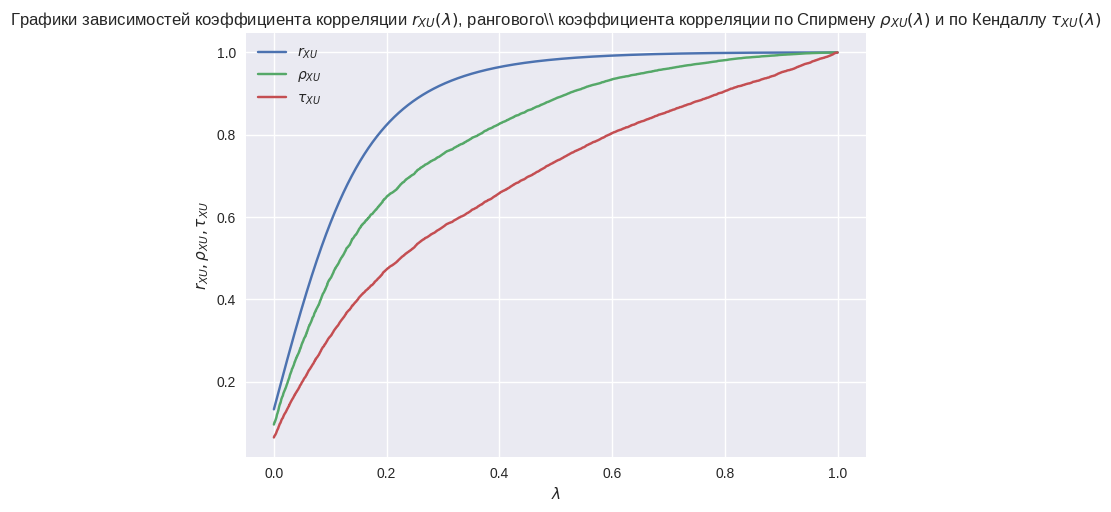

In [19]:
r_XU = []
rho_XU = []
tau_XU = []

for l in lambdas:
    U = l * X + (1 - l) * Y
    r_XU += [stats.pearsonr(X, U)[0]]
    rho_XU += [stats.spearmanr(X, U)[0]]
    tau_XU += [stats.kendalltau(X, U)[0]]

plt.plot(lambdas, r_XU, label=r"$r_{XU}$")
plt.plot(lambdas, rho_XU, label=r"$\rho_{XU}$")
plt.plot(lambdas, tau_XU, label=r"$\tau_{XU}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XU}, \rho_{XU}, \tau_{XU}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XU}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XU}(\lambda)$ и по Кендаллу $\tau_{XU}(\lambda)$"
)
plt.legend()
plt.show()

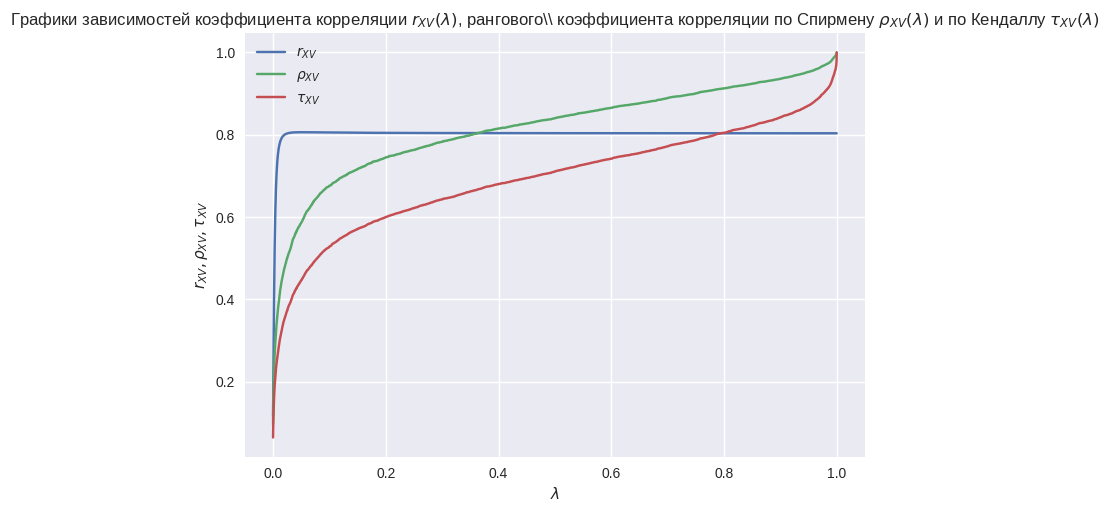

In [20]:
r_XV = []
rho_XV = []
tau_XV = []

for l in lambdas:
    V = l * X**3 + (1 - l) * Y**3
    r_XV += [stats.pearsonr(X, V)[0]]
    rho_XV += [stats.spearmanr(X, V)[0]]
    tau_XV += [stats.kendalltau(X, V)[0]]

plt.plot(lambdas, r_XV, label=r"$r_{XV}$")
plt.plot(lambdas, rho_XV, label=r"$\rho_{XV}$")
plt.plot(lambdas, tau_XV, label=r"$\tau_{XV}$")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$r_{XV}, \rho_{XV}, \tau_{XV}$")
plt.title(
    r"Графики зависимостей коэффициента корреляции $r_{XV}(\lambda)$, рангового\\ коэффициента корреляции по Спирмену $\rho_{XV}(\lambda)$ и по Кендаллу $\tau_{XV}(\lambda)$"
)
plt.legend()
plt.show()

**Вывод**

По первому графику, отображающему зависимости $r_{XU}(\lambda)$, $\rho_{XU}(\lambda)$, $\tau_{XU}(\lambda)$, видно, что при $\lambda \to 0$ все коэффициенты корреляции стремятся к нулю, что свидетельствует об отсутствии линейной корреляционной связи между случайными величинами $X$ и $U$ (при $\lambda = 0$ имеем $U = Y$, независимую от $X$). При $\lambda \to 1$ все коэффициенты корреляции стремятся к $1$, что свидетельствует о наличии линейной функциональной зависимости между случайными величинами $X$ и $U$ (при $\lambda = 1$ выполняется $U = X$).

По второму графику, на котором изображены зависимости $r_{XV}(\lambda)$, $\rho_{XV}(\lambda)$, $\tau_{XV}(\lambda)$, видно, что $r_{XV}(\lambda)$ никогда не достигает значения $1$, что свидетельствует об отсутствии линейной функциональной зависимости между случайными величинами $X$ и $V$. Однако при $\lambda \to 1$ коэффициенты корреляции $\rho_{XV}(\lambda)$ и $\tau_{XV}(\lambda)$ стремятся к $1$, что указывает на наличие монотонной функциональной зависимости между случайными величинами $X$ и $V$ (при $\lambda = 1$ имеем $V = X^3$). При $\lambda \to 0$ коэффициенты корреляции $r_{XV}(\lambda)$, $\rho_{XV}(\lambda)$, $\tau_{XV}(\lambda)$ близки к нулю, что свидетельствует об отсутствии линейной и даже монотонной корреляционной связи между случайными величинами $X$ и $V$.


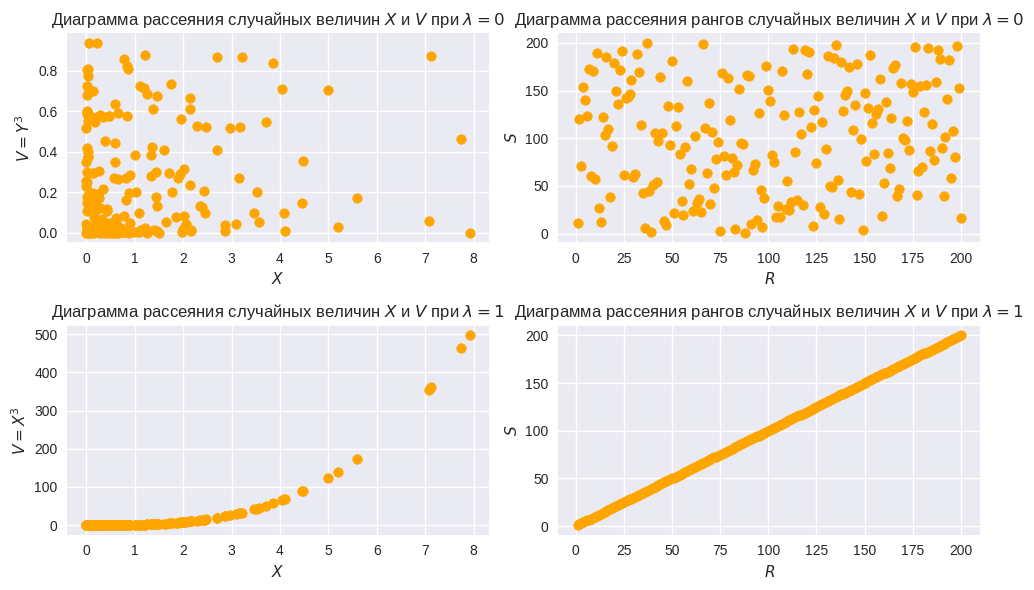

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].scatter(X, Y**3, color="orange")
axes[0, 0].set_xlabel(r"$X$")
axes[0, 0].set_ylabel(r"$V = Y^3$")
axes[0, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[0, 1].scatter(stats.rankdata(X), stats.rankdata(Y**3), color="orange")
axes[0, 1].set_xlabel(r"$R$")
axes[0, 1].set_ylabel(r"$S$")
axes[0, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 0$"
)

axes[1, 0].scatter(X, X**3, color="orange")
axes[1, 0].set_xlabel(r"$X$")
axes[1, 0].set_ylabel(r"$V = X^3$")
axes[1, 0].set_title(
    r"Диаграмма рассеяния случайных величин $X$ и $V$ при $\lambda = 1$"
)

axes[1, 1].scatter(stats.rankdata(X), stats.rankdata(X**3), color="orange")
axes[1, 1].set_xlabel(r"$R$")
axes[1, 1].set_ylabel(r"$S$")
axes[1, 1].set_title(
    r"Диаграмма рассеяния рангов случайных величин $X$ и $V$ при $\lambda = 1$"
)

plt.tight_layout()
plt.show()

Выводы:

Если $X$ и $V$ независимы, то и их ранги $R$ и $S$ также будут независимыми. 

Если $V = \varphi(X)$, $\varphi$ - монотонная функция, то переход к рангам "выпрямляет" монотонную зависимость исходных признаков.